In [181]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [183]:
#importing the dataset
data = pd.read_csv(r'C:\Users\parvathi143\Desktop\Dataset_collection\f2.csv')
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


In [184]:
# # Define the number of augmented samples to create for each original sample
# # increase dataset from 100 rows to 500


# num_augmented_samples = 3

# augmented_data = []

# for index, row in data.iterrows():
#     original_sample = row.to_dict()
#     augmented_samples = []

#     for _ in range(num_augmented_samples):
#         augmented_sample = original_sample.copy()
#         augmented_sample['Temparature'] += np.random.normal(0, 0.1)
#         augmented_sample['Humidity'] += np.random.normal(0, 0.1)
#         augmented_sample['Moisture'] += np.random.normal(0, 0.1)
#         augmented_sample['Nitrogen'] += np.random.normal(0, 0.1)
#         augmented_sample['Potassium'] += np.random.normal(0, 0.1)
#         augmented_sample['Phosphorous'] += np.random.normal(0, 0.1)
#         # Add more transformations for other columns as needed
#         augmented_samples.append(augmented_sample)


#     augmented_data.extend(augmented_samples)

# # Convert the augmented data to a DataFrame
# augmented_dataset = pd.DataFrame(augmented_data)

# # Concatenate the original dataset 
# data = pd.concat([dataset, augmented_dataset], ignore_index=True)

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB


In [186]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [187]:
#checking unique values
data.nunique()

Temparature    21
Humidity       34
Moisture       41
Soil_Type       5
Crop_Type      17
Nitrogen       47
Potassium      31
Phosphorous    36
Fertilizer     14
dtype: int64

In [188]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [189]:
data['Fertilizer'].unique()

array(['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-10'],
      dtype=object)

In [190]:
data['Crop_Type'].unique()

array(['rice', 'Wheat', 'Tobacco', 'Sugarcane', 'Pulses', 'pomegranate',
       'Paddy', 'Oil seeds', 'Millets', 'Maize', 'Ground Nuts', 'Cotton',
       'coffee', 'watermelon', 'Barley', 'kidneybeans', 'orange'],
      dtype=object)

In [192]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,552.000000,552.000000,552.000000,552,552,552.000000,552.000000,552.000000,552
unique,NaN,NaN,NaN,5,17,NaN,NaN,NaN,14
top,NaN,NaN,NaN,Loamy,Cotton,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,192,64,NaN,NaN,NaN,108
mean,28.630435,64.557971,42.840580,NaN,NaN,28.521739,10.144928,21.115942,NaN
std,5.088082,11.880236,11.507275,NaN,NaN,29.121989,13.456956,14.920514,NaN
min,0.000000,50.000000,25.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,26.000000,54.000000,33.000000,NaN,NaN,10.000000,0.000000,8.000000,NaN
50%,29.000000,62.000000,41.000000,NaN,NaN,15.000000,0.000000,20.000000,NaN
75%,32.000000,68.000000,51.000000,NaN,NaN,37.000000,18.000000,36.000000,NaN


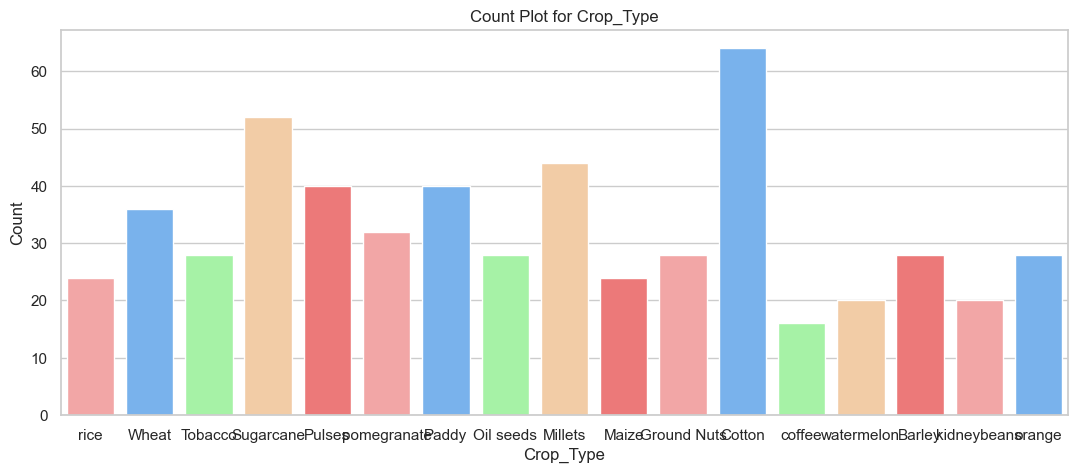

In [195]:
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")

# Using a custom color palette
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666']
sns.countplot(data=data, x='Crop_Type', palette=custom_colors)

plt.title('Count Plot for Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()


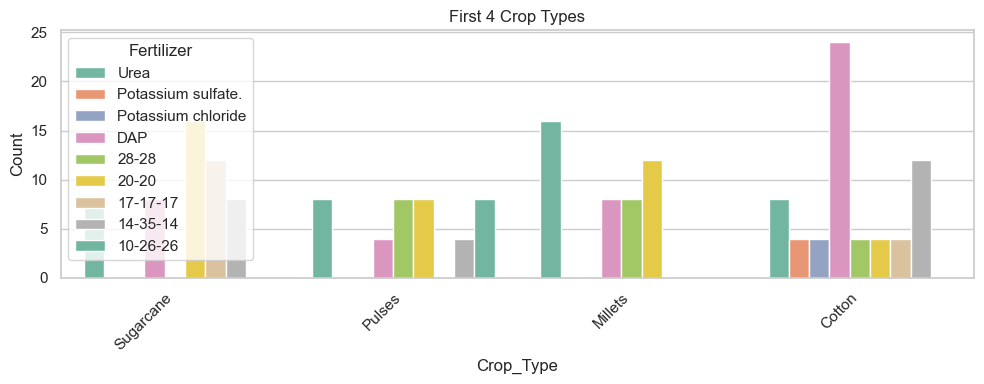

In [197]:

#first 4 crop types
part1_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[:4])]

# Create the first countplot
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
sns.countplot(data=part1_data, x='Crop_Type', hue='Fertilizer', palette='Set2')
plt.title('First 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()


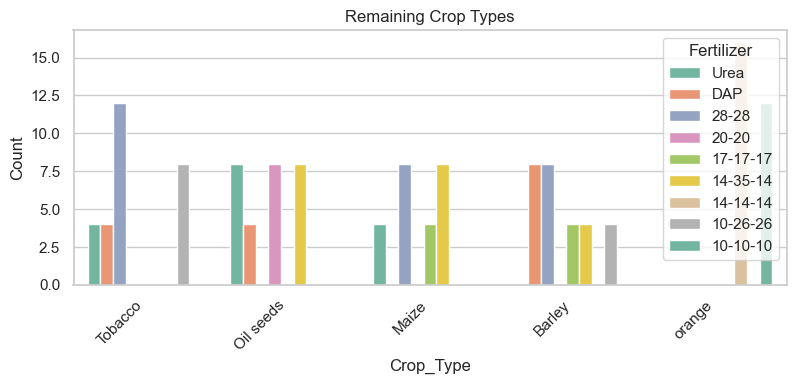

In [198]:
# Split the data into three parts: remaining crop types
part3_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[8:13])]

# Create the third countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part3_data, x='Crop_Type', hue='Fertilizer',  palette='Set2')
plt.title('Remaining Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()


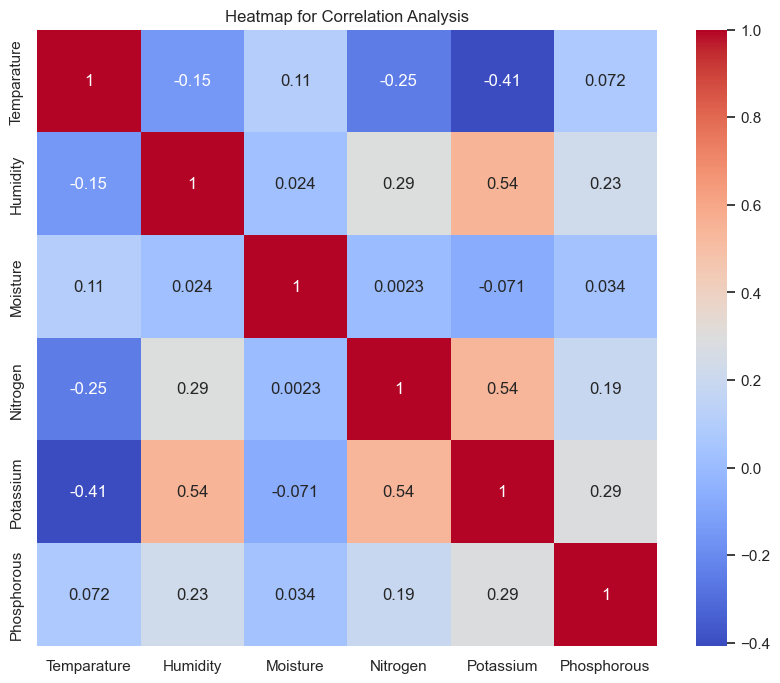

In [200]:
# Select only the numeric columns for the correlation heatmap
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

plt.title('Heatmap for Correlation Analysis')
plt.show()


In [202]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder
#it  transforming non-numeric data into a numeric format

In [204]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [205]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [208]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-10-10,0
10-26-26,1
14-14-14,2
14-35-14,3
15-15-15,4
17-17-17,5
20-20,6
28-28,7
DAP,8


In [209]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.25,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.model_selection import train_test_split


print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))
y_test=list(y_test)

Shape of Splitting :
x_train = (414, 8), y_train = (414,), x_test = (138, 8), y_test = (138,)


In [215]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 280 to 102
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  414 non-null    int64
 1   Humidity     414 non-null    int64
 2   Moisture     414 non-null    int64
 3   Soil_Type    414 non-null    int32
 4   Crop_Type    414 non-null    int32
 5   Nitrogen     414 non-null    int64
 6   Potassium    414 non-null    int64
 7   Phosphorous  414 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 25.9 KB


In [216]:
acc = [] # TEST
model = []
acc1=[] # TRIAN

In [217]:
# Importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5)
model.fit(x_train, y_train)

# Predict on the test set
test_predictions = model.predict(x_test)
test_accuracy = metrics.accuracy_score(y_test, test_predictions)

# Append test accuracy
acc.append(test_accuracy)

# Predict on the training set
train_predictions = model.predict(x_train)
train_accuracy = metrics.accuracy_score(y_train, train_predictions)

# Append training accuracy
acc1.append(train_accuracy)

# Print accuracies
print(f"Decision Trees's Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Decision Trees's Train Accuracy: {train_accuracy * 100:.2f}%")

# Classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_predictions))


Decision Trees's Test Accuracy: 93.48%
Decision Trees's Train Accuracy: 93.48%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         9
           2       0.71      1.00      0.83         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        30
           8       0.92      0.96      0.94        23
          10       0.00      0.00      0.00         2
          11       0.25      1.00      0.40         1
          12       0.86      0.86      0.86         7
          13       1.00      0.90      0.95        31

    accuracy                           0.93       138
   macro avg       0.83      0.88      0.83       138
weighted avg       0

In [219]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Naive Bayes model
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train)

# Predict on the test set
test_predictions = NaiveBayes.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
acc.append(test_accuracy)

# Predict on the training set
train_predictions = NaiveBayes.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)
acc1.append(train_accuracy)

# Append the model name
#model.append('Naive Bayes')

# Print accuracies
print(f"Naive Bayes's Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Naive Bayes's Train Accuracy: {train_accuracy * 100:.2f}%")

# Classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_predictions))



Naive Bayes's Test Accuracy: 93.48%
Naive Bayes's Train Accuracy: 90.58%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       0.50      1.00      0.67         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        30
           8       0.88      0.91      0.89        23
          10       1.00      1.00      1.00         2
          11       0.33      1.00      0.50         1
          12       0.75      0.86      0.80         7
          13       1.00      0.87      0.93        31

    accuracy                           0.93       138
   macro avg       0.88      0.95      0.89       138
weighted avg       0.95   

In [220]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

# Normalize the data
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
X_test_norm = norm.transform(x_test)

# Initialize and train the SVM model
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm, y_train)

# Predict on the test set
test_predictions = SVM.predict(X_test_norm)
test_accuracy = accuracy_score(y_test, test_predictions)
acc.append(test_accuracy)

# Predict on the training set
train_predictions = SVM.predict(X_train_norm)
train_accuracy = accuracy_score(y_train, train_predictions)
acc1.append(train_accuracy)

# Print accuracies
print(f"SVM's Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"SVM's Train Accuracy: {train_accuracy * 100:.2f}%")

# Classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_predictions))


SVM's Test Accuracy: 99.28%
SVM's Train Accuracy: 99.28%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        23
          10       1.00      1.00      1.00         2
          11       0.50      1.00      0.67         1
          12       1.00      1.00      1.00         7
          13       1.00      0.97      0.98        31

    accuracy                           0.99       138
   macro avg       0.96      1.00      0.97       138
weighted avg       1.00      0.99      0.9

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
LogReg = LogisticRegression(random_state=2)
LogReg.fit(x_train, y_train)

# Predict on the test set
test_predictions = LogReg.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
acc.append(test_accuracy)

# Predict on the training set
train_predictions = LogReg.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)
acc1.append(train_accuracy)

# Print accuracies
print(f"Logistic Regression's Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Logistic Regression's Train Accuracy: {train_accuracy * 100:.2f}%")

# Classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_predictions))


Logistic Regression's Test Accuracy: 90.58%
Logistic Regression's Train Accuracy: 88.65%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         9
           2       0.71      1.00      0.83         5
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        30
           8       0.95      0.83      0.88        23
           9       0.00      0.00      0.00         0
          10       1.00      1.00      1.00         2
          11       0.33      1.00      0.50         1
          12       0.50      0.43      0.46         7
          13       0.93      0.90      0.92        31

    accuracy                           0.91       138
   macro a

In [223]:
from sklearn.model_selection import cross_val_score


score = cross_val_score(LogReg,data,data.Fertilizer,cv=5)
print("Cross-validation score of LogReg is:",score)
score = cross_val_score(SVM,data,data.Fertilizer,cv=5)
print("Cross-validation score of SVM is:",score)
score = cross_val_score(NaiveBayes,data,data.Fertilizer,cv=5)
print("Cross-validation score of NaiveBayes is:",score)


Cross-validation score of LogReg is: [0.97297297 0.94594595 0.91818182 0.88181818 0.87272727]
Cross-validation score of SVM is: [0.96396396 0.92792793 0.91818182 0.88181818 0.98181818]
Cross-validation score of NaiveBayes is: [1. 1. 1. 1. 1.]


In [225]:
import pickle
# Assuming 'model' is your trained classifier
with open('C:/Users/parvathi143/Desktop/webapp/webapp/models/classifier.pkl', 'wb') as f:
    pickle.dump(model, f)


In [226]:
import joblib
# Save the model
joblib.dump(model, 'classifier.joblib')

# Load the model
model = joblib.load('classifier.joblib')


In [227]:
model = pickle.load(open(r'C:\Users\parvathi143\Desktop\webapp\webapp\models\classifier.pkl', 'rb'))

In [229]:
#model = pickle.load(open(r'\Users\parvathi143\Desktop\notebooks\models\classifier.pkl','rb')
model.predict([[34,67,62,0,1,7,0,30]])[0]

3

In [230]:
#model = pickle.load(open('../models/classifier.pkl','rb'))
fertilizer=model.predict([[27,55,44,0,1,2,24,38]])
print(fertilizer)
data['Fertilizer'][fertilizer]

[11]


11    13
Name: Fertilizer, dtype: int32

In [257]:
import joblib
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
with open('C:/Users/parvathi143/Desktop/webapp/webapp/models/fertilizer_model.pkl', 'wb') as f:
    pickle.dump(model, f)
joblib.dump(model, 'fertilizer.joblib')

# Load the model
ferti = joblib.load('fertilizer.joblib')
ferti = pickle.load(open(r'C:\Users\parvathi143\Desktop\webapp\webapp\models\fertilizer_model.pkl', 'rb'))
#input_data = [[34, 67, 62, 0, 1, 7, 0, 30]]
#ferti.predict(input_data)[0]
#ferti.predict([[34,67,62,0,1,7,0,30]])
encode_ferti = LabelEncoder()
fertilizer_classes = ["10-10-10","10-26-26"	,"14-14-14"	,"14-35-14"	,"15-15-15"	,"17-17-17"	,"20-20"	,"28-28"	,"DAP"	,"Potassium chloride"	,"Potassium sulfate","Superphosphate"	,"TSP"	,"Urea"]  # Your actual fertilizer names
encode_ferti.fit(fertilizer_classes)  # Fit encoder with fertilizer names

# Sample Input Data: [temperature, humidity, moisture, soil_type, crop_type, nitrogen, potassium, phosphorus]
input_data = [[34, 67, 62, 0, 1, 7, 0, 30]]

# Predict Fertilizer (returns encoded number)
predicted_index = ferti.predict(input_data)[0]

# Convert index to fertilizer name
fertilizer_name = encode_ferti.inverse_transform([predicted_index])[0]  # Convert number to name

print(fertilizer_name)

14-35-14


In [261]:
#ferti = pickle.load(open(r'C:\Users\parvathi143\Desktop\webapp\webapp\models\fertilizer_model.pkl', 'rb'))
#ferti.classes_[1]